In [1]:
import final as fin
import numpy as np
import matplotlib.pyplot as plt
from distance import gps_wgs84

The peak spatial frequency is 0.000 1/m


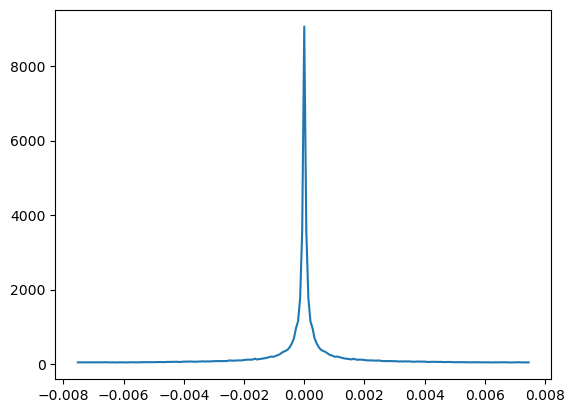

In [2]:
(t, lat, lon, alt, alt84, speed, 
 direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
    fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.csv')[0],
    skiprows=1,
    delimiter = ',',
    unpack=True)

x, y, z = gps_wgs84(lat, lon, alt84)

lat = lat - lat[0]
lon = lon - lon[0]

fft_spectrum = np.fft.fft(lon*63781.37)

dx = lat[1]*6378137 - lat[0]*63781.37  # Sampling interval (check uniformity!)
frequencies = np.fft.fftfreq(len(lat), d=dx)

shifted_spectrum = np.fft.fftshift(fft_spectrum)
shifted_frequencies = np.fft.fftshift(frequencies)

plt.plot(shifted_frequencies, np.abs(shifted_spectrum))

peak_index = np.argmax(np.abs(shifted_spectrum))  # Index of maximum amplitude
peak_frequency = shifted_frequencies[peak_index]  # Spatial frequency at the peak

# Output result
print(f"The peak spatial frequency is {peak_frequency:.3f} 1/m")

#plt.plot(lon[1:len(lon)]*6378137, np.fft.fftshift(fin.forward_fft(lat[1:len(lon)]*6378137)), '.', linestyle = 'none')


In [17]:
#Get all Temperatures
T = []
for i in range(10):
    temp = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.md')[i],
        skiprows=5,
        delimiter = ',',
        unpack=True)
    
print(T)
#Covert temperatures to Kelvin
T_K = fin.fahrenheit_to_kelvin(T)

#Initialize lists to plot
tlist = []
latlist = []
lonlist = []

#Loop over all files using list_files function from final.py and add their data to the overall lists
for i in range(10):
    (t, lat, lon, alt, alt84, speed, 
    direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.csv')[i],
        skiprows=1,
        delimiter = ',',
        unpack=True)

    tlist.append(t)
    latlist.append(lat)
    lonlist.append(lon)

#Set origin as final position of first trial 
# (setting  origin as initial makes all x-data negative and i think that's ugly)
# and multiply latitude and longitude by 
# radius of the Earth in meters to get meters on axes

lat_centered = []
lon_centered = []

for lat in latlist:
    lat_centered.append((lat - latlist[0][-1])*63781.37)
for lon in lonlist:
    lon_centered.append((lon - lonlist[0][-1])*63781.37)

for i in range(len(lat_centered)):
    freq, mag, spectrum = fin.forward_fft(lon_centered[i], lat_centered[i] - np.average(lat_centered[i]))
    plt.plot(freq, mag, '.', label = f'Trial {i+1}: T = {round(T_K[i],1)} K')

plt.legend()
plt.xlabel('Frequency $\\left(\\frac{1}{100}m\\right)$')
plt.ylabel('Fourier Magnitude')

[]


TypeError: unsupported operand type(s) for -: 'list' and 'int'

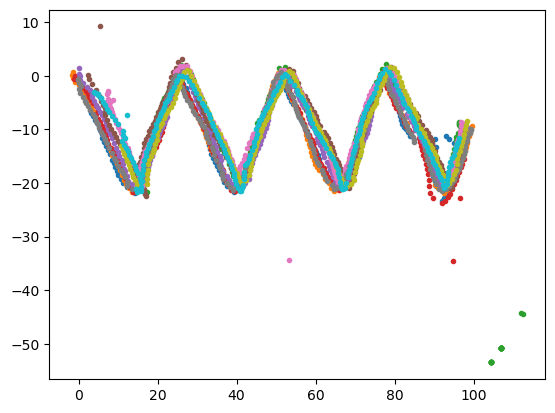

In [4]:
for i in range(len(lat_centered)):
    freq, mag, spectrum = fin.forward_fft(lon_centered[i], lat_centered[i])
    plt.plot(lon_centered[i], fin.inverse_fft(spectrum), '.', label = f'Trial {i+1}: T = {round(T_K,1)} K')

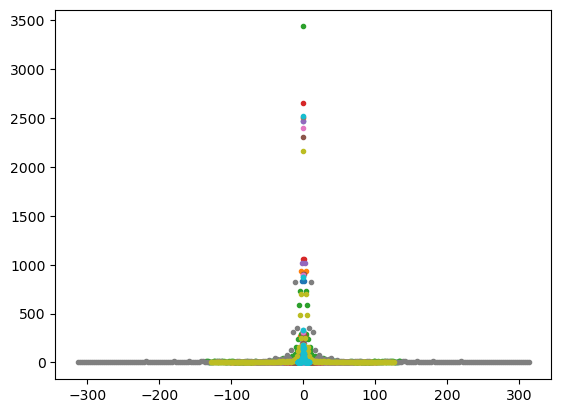

In [5]:
#Get all Temperatures
T = []
for i in range(10):
    T = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.md')[i],
        skiprows=5,
        delimiter = ',',
        unpack=True)

#Covert temperatures to Kelvin
T_K = fin.fahrenheit_to_kelvin(T)

#Initialize lists to plot
tlist = []
latlist = []
lonlist = []

#Loop over all files using list_files function from final.py and add their data to the overall lists
for i in range(10):
    (t, lat, lon, alt, alt84, speed, 
    direction, distance, sigma_horz_meters, sigma_alt_meters, satellites) = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.csv')[i],
        skiprows=1,
        delimiter = ',',
        unpack=True)

    tlist.append(t)
    latlist.append(lat)
    lonlist.append(lon)

#Set origin as final position of first trial 
# (setting  origin as initial makes all x-data negative and i think that's ugly)
# and multiply latitude and longitude by 
# radius of the Earth in meters to get meters on axes

lat_centered = []
lon_centered = []

for lat in latlist:
    lat_centered.append((lat - latlist[0][-1])*63781.37)
for lon in lonlist:
    lon_centered.append((lon - lonlist[0][-1])*63781.37)

for i in range(len(lat_centered)):
    freq, mag, spectrum = fin.forward_fft(lon_centered[i],fin.sine(lon_centered[i],*fin.sinefit_wrapper(lon_centered[i], lat_centered[i], p0 = [-20, 1/3.5, -20, -10])))
    plt.plot(freq, mag, '.', label = f'Temperature = {round(T_K,1)} K')
    

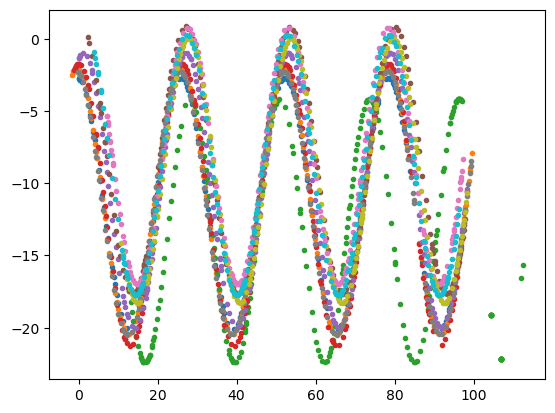

In [6]:
for i in range(len(lat_centered)):
    freq, mag, spectrum = fin.forward_fft(lon_centered[i],fin.sine(lon_centered[i],*fin.sinefit_wrapper(lon_centered[i], lat_centered[i], p0 = [-20, 1/3.5, -20, -10])))
    plt.plot(lon_centered[i], fin.inverse_fft(spectrum), '.', label = f'Trial {i+1}: T = {round(T_K,1)} K')

ValueError: setting an array element with a sequence.

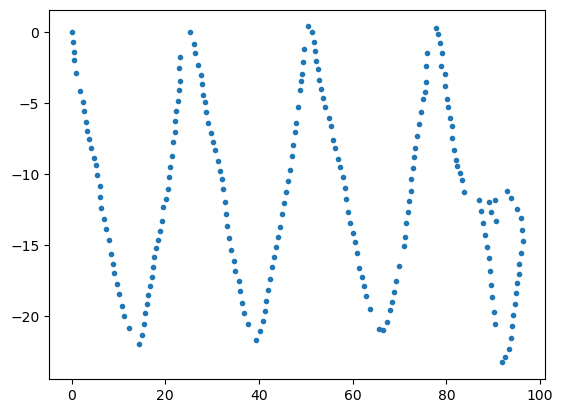

In [7]:
#Plot all the data with the legend
for i in range(len(lat_centered)):
    plt.plot(lon_centered[i],lat_centered[i], '.', label = f'Trial {i+1}: T = {round(T_K,1)} K')
    plt.plot(lon_centered[i],fin.sine(lon_centered[i],*fin.curve_fit_fixed(fin.sine, lon_centered[i], lat_centered[i], [-20, 1/3.5, -20, -10])), linestyle = '--')

plt.xlabel('Distance West of Origin (Meters)')
plt.ylabel('Distance North of Origin (Meters)')
plt.legend(ncol = 2, bbox_to_anchor=(0.5, 0.05), loc='lower center');

In [11]:
#Get all Temperatures
T = []
for i in range(10):
    T = np.loadtxt(
        fin.list_files('/workspaces/CP1-24-final/iglesias-cardinale/data/Final', 'ic0', '.md')[i],
        skiprows=5,
        delimiter = ',',
        unpack=True)
    
print(T)

38.0
